In [ ]:
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

In [ ]:
# Plotting support
from matplotlib import pyplot as plt
%matplotlib inline

# Standard libraries
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<u>Loading Data</u>

In [ ]:
df       = pd.read_csv("/content/drive/MyDrive/CSC 503 - Data Mining/Project/Data/train.csv")
df_test  = pd.read_csv("/content/drive/MyDrive/CSC 503 - Data Mining/Project/Data/test.csv")

In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
coldf=df.columns.to_frame()

In [ ]:
coldf.tail()

,0
"angle(X,gravityMean)","angle(X,gravityMean)"
"angle(Y,gravityMean)","angle(Y,gravityMean)"
"angle(Z,gravityMean)","angle(Z,gravityMean)"
subject,subject
Activity,Activity


In [ ]:
df.drop(columns="subject", axis=1, inplace=True)
df_test.drop(columns="subject", axis=1, inplace=True)

In [ ]:
df.Activity.dtype

dtype('O')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 31.5+ MB


<u>Categorical Encoding<u>

In [ ]:
df["Activity"]      = df["Activity"].astype('category')
df_test["Activity"] = df_test["Activity"].astype('category')

In [ ]:
df["Activity_Labels"] = df["Activity"].cat.codes
df_test["Activity_Labels"] = df_test["Activity"].cat.codes

In [ ]:
df["Activity_Labels"]

0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity_Labels, Length: 7352, dtype: int8

In [ ]:
# Drop Column Activity as its been replaced with 'Activity-Labels'
df.drop(columns="Activity", axis=1, inplace=True)
df_test.drop(columns="Activity", axis=1, inplace=True)

In [ ]:
# Separate Data and Label for train and test set
X      = df.drop(columns="Activity_Labels",axis=1)
y      = df["Activity_Labels"]

X_test = df_test.drop(columns="Activity_Labels",axis=1)
y_test = df_test["Activity_Labels"]

<b>Dimensionality Reduction   
<u>Implementing PCA with 90% variance</u></b>

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(0.90)
pca_output      = pca.fit_transform(X.values)

# Check features are reduced to how many components - Component Count
pca.n_components_

34

Observation:   
After PCA features are reduced from 562 to 34 features.

In [ ]:
#Building the Projected Train dataframe
Projected_columns=[]
for i in range(pca.n_components_):
  Projected_columns.append('col_'+str(i))

In [ ]:
Projected_df= pd.DataFrame(pca_output,columns=Projected_columns)

In [ ]:
Projected_df["Class"]=y

In [ ]:
Projected_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,Class
0,-5.520280,-0.290278,-1.529929,1.333242,1.425089,-0.194708,0.577454,0.691490,-1.222865,-0.363414,-0.081356,0.051628,0.959374,1.228029,1.471873,0.042504,-0.247260,-0.646486,0.517711,0.524570,-0.232662,-0.281923,-0.149159,-0.445527,-0.623863,0.058478,-0.061776,-0.574233,-1.031077,0.145442,1.413358,-0.424984,-0.305009,-0.245045,2
1,-5.535350,-0.082530,-1.924804,0.671273,0.671260,0.735144,-0.616908,-0.771714,-0.615496,-0.895525,-0.339903,-0.072326,0.224393,0.294888,0.273483,0.171436,0.130087,0.458148,0.162881,0.041735,0.372725,0.557832,-0.009476,0.058239,-0.135733,-0.441125,0.077243,-0.626729,0.051226,-0.114860,0.050802,0.102478,-0.141135,-0.465369,2
2,-5.474988,0.287387,-2.144642,0.531806,0.207824,-0.037772,0.057628,0.093917,-0.063147,-0.216898,-0.178427,0.297982,-0.097776,0.185711,0.179611,-0.257820,0.009079,0.328574,0.560250,0.151594,0.349286,0.909580,0.245484,0.134095,0.087499,-0.078237,-0.350594,0.019942,-0.096296,0.196007,-0.397665,-0.035724,0.373212,-0.015986,2
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079547,-0.267805,-0.731391,0.281296,0.466269,-0.226853,-0.348434,-0.707418,0.076890,-0.143724,-0.104034,0.055708,-0.299547,-0.056019,-0.289759,-0.135981,-0.140244,-0.115074,-0.359083,0.353560,-0.308377,0.195371,-0.020905,-0.301993,0.100186,0.004239,-0.200665,0.841743,0.121598,2
4,-5.748749,1.162952,-2.139533,0.207823,0.473090,0.463035,-0.152227,-0.107509,0.289819,0.539206,-0.388249,-0.097442,-0.440733,-0.248946,0.377179,0.140955,0.264272,0.212104,-0.698940,-0.503464,-0.518617,0.345950,0.386155,-0.131487,0.212203,0.037073,0.240130,0.143649,0.418521,0.025994,-0.304426,0.059155,0.129916,0.335800,2


In [ ]:
Projected_df.to_csv("PCA_data_train.csv")

Tranforming test data to 34 components/features

In [ ]:
pca_output_test = pca.transform(X_test)

In [ ]:
#Building the Projected Train dataframe
Projected_columns=[]
for i in range(pca.n_components_):
  Projected_columns.append('col_'+str(i))

In [ ]:
Projected_df_test= pd.DataFrame(pca_output_test,columns=Projected_columns)

In [ ]:
Projected_df_test["Class"]=y_test

In [ ]:
Projected_df_test.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,Class
0,-2.686743,-1.216821,-0.722075,-0.117271,-0.546360,0.442701,-0.387679,0.327529,0.117682,-1.593977,1.304678,0.031279,0.460255,1.948842,1.375323,-0.056748,-0.519423,0.427495,-0.186899,0.151814,-0.011180,0.191239,-0.624719,0.097983,-0.494689,0.581287,-0.464077,-0.172273,0.661018,-0.111852,0.935456,-0.229520,-0.854052,-0.350674,2
1,-4.331255,-0.766327,-1.128404,-0.152942,-0.505817,0.485306,-0.423214,0.805947,0.591644,-0.986363,0.822069,0.670615,-0.059785,0.332495,1.003045,0.572141,-0.540900,0.335092,0.461837,0.560475,0.420514,0.675158,-0.028921,-0.806020,-0.043777,0.996701,0.597320,0.023259,0.809898,0.824455,-0.241112,-0.236001,-0.794151,-0.202530,2
2,-4.985360,0.371301,-1.656858,-0.235971,-0.102938,-0.113283,-0.143993,0.279862,0.330125,-0.163722,0.032124,-0.639116,-0.746860,0.375007,0.860269,-0.187235,0.436794,-0.069230,0.502669,-0.223798,0.024279,-0.111600,-0.014632,-0.769830,0.092090,0.368614,-0.135035,0.346628,-0.504355,-0.006287,-0.171418,-0.077245,0.504860,-0.371783,2
3,-5.099876,0.243743,-1.802703,0.263715,-0.050454,-0.794957,0.083771,0.650500,0.270365,0.321617,-0.410402,-0.324809,-0.464828,-0.496677,1.055181,-0.133006,-0.031111,0.023301,0.578292,-0.262771,0.084390,-0.119842,0.320881,-0.902269,-0.057790,0.661725,-0.037761,-0.239778,-0.431563,0.318179,-0.633366,0.134140,0.487754,-0.518927,2
4,-5.023000,-0.518739,-1.871078,0.106466,0.153655,-0.947262,0.668394,0.792005,0.932680,0.593944,-0.754802,-0.098596,-0.524694,-0.320836,0.068349,0.290560,-0.103566,0.117574,-0.174046,-0.228588,0.052739,-0.299358,0.338667,-0.269739,-0.211368,-0.175551,-0.659512,0.042679,0.135818,0.284589,0.065170,0.088421,0.136543,-0.054600,2


In [ ]:
Projected_df_test.to_csv("PCA_data_test.csv")

<u>Train Validation Test Split on PCA Data</u>  
Train Test is split into Training and Validation Set.    
Testing Set is separate from beginning. So, it will be split based on index.

In [ ]:
XX=Projected_df.drop(columns="Class",axis=1)
yy=Projected_df["Class"]

In [ ]:
X_test = Projected_df_test.drop(columns="Class",axis=1)
y_test = Projected_df_test["Class"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(XX, yy, test_size=0.20, random_state=101)

Data Frame to store results!

In [ ]:
df_results = pd.DataFrame(columns =['Model Name', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy'])

<b>Implementing Machine Learning Models on PCA Data</b>   

<u>1. AdaBoost Classifier</u>

In [ ]:
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#XGBoost classifier
ada = AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
# fit the model
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=42)

In [ ]:
# model assessment
pred_train_ada = ada.predict(X_train)
pred_valid_ada = ada.predict(X_validation)
pred_test_ada  = ada.predict(X_test)
  
print(classification_report(y_test,pred_test_ada))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       537
           1       0.00      0.00      0.00       491
           2       0.51      1.00      0.67       532
           3       0.36      1.00      0.53       496
           4       0.00      0.00      0.00       420
           5       0.00      0.00      0.00       471

    accuracy                           0.52      2947
   macro avg       0.31      0.49      0.36      2947
weighted avg       0.33      0.52      0.39      2947



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Train Accuracy: ', accuracy_score(y_train, pred_train_ada))
print('Validation Accuraccy: ', accuracy_score(y_validation, pred_valid_ada))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test_ada))

Train Accuracy:  0.550586634926033
Validation Accuraccy:  0.5316111488783141
Test Accuraccy:  0.5191720393620631


In [ ]:
# Append results in dataframe
data = [{'Model Name': 'AdaBoost on PCA Data', 
         'Train Accuracy': accuracy_score(y_train, pred_train_ada),
         'Validation Accuracy': accuracy_score(y_validation, pred_valid_ada),
         'Test Accuracy': accuracy_score(y_test, pred_test_ada),}]
df_results = df_results.append(data, ignore_index=True)

<u>2. Random Forest Classifier</u>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)

Implementing GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the random grid
param_grid = { 
    'n_estimators': [400,500,600],
    'max_features': ['auto', 'log2'],
}

rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [ ]:
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
rfc_grid.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [ ]:
rfc = RandomForestClassifier(random_state=42,n_estimators= 500).fit(X_train,y_train)

In [ ]:
# model assessment
pred_train_rfc = rfc.predict(X_train)
pred_valid_rfc = rfc.predict(X_validation)
pred_test_rfc  = rfc.predict(X_test)

print(classification_report(y_test,pred_test_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       537
           1       0.87      0.79      0.83       491
           2       0.83      0.90      0.86       532
           3       0.85      0.97      0.91       496
           4       0.92      0.80      0.85       420
           5       0.92      0.90      0.91       471

    accuracy                           0.89      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



In [ ]:
print('Train Accuracy: ', accuracy_score(y_train, pred_train_rfc))
print('Validation Accuraccy: ', accuracy_score(y_validation, pred_valid_rfc))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test_rfc))

Train Accuracy:  1.0
Validation Accuraccy:  0.9422161794697484
Test Accuraccy:  0.8944689514760774


In [ ]:
# Append results in dataframe
data = [{'Model Name': 'Random Forest on PCA Data', 
         'Train Accuracy': accuracy_score(y_train, pred_train_rfc),
         'Validation Accuracy': accuracy_score(y_validation, pred_valid_rfc),
         'Test Accuracy': accuracy_score(y_test, pred_test_rfc),}]
df_results = df_results.append(data, ignore_index=True)

<u>3. XGBoost Classifier</u>

In [ ]:
import time
from xgboost import XGBClassifier

In [ ]:
#XGBoost classifier
model = XGBClassifier(tree_method = "gpu_hist",early_stopping=10,n_estimators=500, random_state=42)

In [ ]:
# fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping=10,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
# model assessment
pred_train_xgboost = model.predict(X_train)
pred_valid_xgboost = model.predict(X_validation)
pred_test_xgboost  = model.predict(X_test)

print(classification_report(y_test,pred_test_xgboost))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       537
           1       0.88      0.84      0.86       491
           2       0.87      0.91      0.89       532
           3       0.90      0.96      0.93       496
           4       0.93      0.84      0.88       420
           5       0.90      0.92      0.91       471

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



In [ ]:
print('Train Accuracy: ', accuracy_score(y_train, pred_train_xgboost))
print('Validation Accuraccy: ', accuracy_score(y_validation, pred_valid_xgboost))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test_xgboost))

Train Accuracy:  1.0
Validation Accuraccy:  0.9496940856560163
Test Accuraccy:  0.9114353579911775


In [ ]:
# Append results in dataframe
data = [{'Model Name': 'XGBoost on PCA Data', 
         'Train Accuracy': accuracy_score(y_train, pred_train_xgboost),
         'Validation Accuracy': accuracy_score(y_validation, pred_valid_xgboost),
         'Test Accuracy': accuracy_score(y_test, pred_test_xgboost),}]
df_results = df_results.append(data, ignore_index=True)

In [ ]:
model_new = XGBClassifier(tree_method = "gpu_hist",n_estimators=500, random_state=42,reg_lambda=1)

In [ ]:
# define the eval set and metric
eval_set = [(X_train, y_train), (X_validation, y_validation)]
eval_metric = ["merror","mlogloss"]

In [ ]:
%time model_new.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

CPU times: user 9.1 s, sys: 31 ms, total: 9.13 s
Wall time: 9.1 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
# retrieve performance metrics
results = model_new.evals_result()

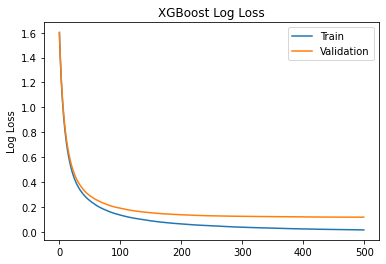

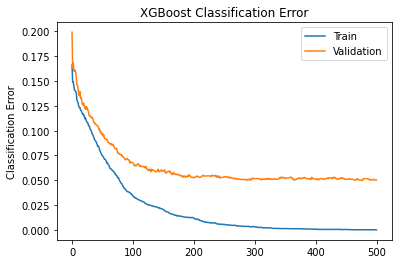

In [ ]:
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Validation')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

<b><u>Implementing t-SNE on reduced data generated using PCA</u></b>

In [ ]:
X_tsne      =Projected_df.drop('Class', axis=1)
X_test_tsne =Projected_df_test.drop('Class', axis=1)
print("X Shape",X_tsne.shape)

X Shape (7352, 34)


In [ ]:
size_train = X_tsne.shape[0]
X_total = np.vstack((X_tsne,X_test_tsne))
y_total = y.append(y_test,ignore_index= True)

In [ ]:
# Import library for TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_total)

X_train_tsne = X_embedded[0:size_train,:]
X_test_tsne  = X_embedded[size_train:,:]

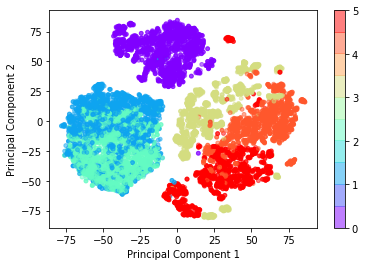

In [ ]:
# Plot the tsne in 2-D
c_map = plt.cm.get_cmap('rainbow', 10)
plt.scatter(X_embedded[:,0], X_embedded[:,1], cmap = c_map, s= 15, c=y_total, alpha=0.5)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#Building the Projected dataframe
Projected_columns_tsne=[]
for i in range(tsne.n_components):
  Projected_columns_tsne.append('col_'+str(i))

In [ ]:
Projected_df_tsne= pd.DataFrame(X_train_tsne ,columns=Projected_columns_tsne)

In [ ]:
Projected_df_tsne["Class"]=y

In [ ]:
Projected_df_tsne.head()

,col_0,col_1,Class
0,-61.516773,-50.214352,2
1,-35.106689,4.534474,2
2,-39.445278,3.675577,2
3,-46.739849,5.357499,2
4,-47.895813,4.257446,2


In [ ]:
Projected_df_tsne.to_csv("PCA_train_data_tsne.csv")

In [ ]:
#Building the Projected dataframe
Projected_columns_tsne=[]
for i in range(tsne.n_components):
  Projected_columns_tsne.append('col_'+str(i))

In [ ]:
Projected_df_test_tsne= pd.DataFrame(X_test_tsne ,columns=Projected_columns_tsne)

In [ ]:
Projected_df_test_tsne["Class"]=y_test

In [ ]:
Projected_df_test_tsne.head()

,col_0,col_1,Class
0,-18.683191,-32.959248,2
1,-27.658190,-25.297066,2
2,-52.570072,-22.878273,2
3,-52.833469,-23.393539,2
4,-40.532623,-40.770279,2


In [ ]:
Projected_df_test_tsne.to_csv("PCA_test_data_tsne.csv")

<u>Train Validation Test Split on TSNE Data</u>  
Train Test is split into Training and Validation Set.    
Testing Set is separate from beginning.

In [ ]:
XX=Projected_df_tsne.drop(columns="Class",axis=1)
yy=Projected_df_tsne["Class"]

In [ ]:
X_test = Projected_df_test_tsne.drop(columns="Class",axis=1)
y_test = Projected_df_test_tsne["Class"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(XX, yy, test_size=0.20, random_state=101)

<b>Implementing Machine Learning Models on t-SNE Data</b>   
<u>1. Random Forest Classifier</u>

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)

Implementing GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the random grid
param_grid = { 
    'n_estimators': [400, 500,600],
    'max_features': ['auto', 'log2'],
}

rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [ ]:
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
rfc_grid.best_params_

{'max_features': 'auto', 'n_estimators': 400}

In [ ]:
rfc = RandomForestClassifier(random_state=42,n_estimators= 500).fit(X_train,y_train)

In [ ]:
# model assessment
pred_train_rfc = rfc.predict(X_train)
pred_valid_rfc = rfc.predict(X_validation)
pred_test_rfc  = rfc.predict(X_test)

print(classification_report(y_test,pred_test_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       537
           1       0.82      0.70      0.76       491
           2       0.76      0.86      0.81       532
           3       0.92      0.82      0.87       496
           4       0.79      0.85      0.82       420
           5       0.81      0.84      0.82       471

    accuracy                           0.85      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.85      0.85      0.85      2947



In [ ]:
print('Train Accuracy: ', accuracy_score(y_train, pred_train_rfc))
print('Validation Accuraccy: ', accuracy_score(y_validation, pred_valid_rfc))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test_rfc))

Train Accuracy:  1.0
Validation Accuraccy:  0.9483344663494222
Test Accuraccy:  0.848320325755005


In [ ]:
# Append results in dataframe
data = [{'Model Name': 'Random Forest on t-SNE Data', 
         'Train Accuracy': accuracy_score(y_train, pred_train_rfc),
         'Validation Accuracy': accuracy_score(y_validation, pred_valid_rfc),
         'Test Accuracy': accuracy_score(y_test, pred_test_rfc),}]
df_results = df_results.append(data, ignore_index=True)

<u>2. XGBoost Classifier</u>

In [ ]:
import time
from xgboost import XGBClassifier

In [ ]:
#XGBoost classifier
model = XGBClassifier(tree_method = "gpu_hist",early_stopping=10,n_estimators=500, random_state=42)

In [ ]:
# fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping=10,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
# model assessment
pred_train_model = model.predict(X_train)
pred_valid_model = model.predict(X_validation)
pred_test_model  = model.predict(X_test)

print(classification_report(y_test,pred_test_model))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       537
           1       0.85      0.64      0.73       491
           2       0.73      0.90      0.81       532
           3       0.84      0.81      0.82       496
           4       0.71      0.83      0.77       420
           5       0.87      0.79      0.83       471

    accuracy                           0.83      2947
   macro avg       0.83      0.83      0.82      2947
weighted avg       0.84      0.83      0.83      2947



In [ ]:
print('Train Accuracy: ', accuracy_score(y_train, pred_train_model))
print('Validation Accuraccy: ', accuracy_score(y_validation, pred_valid_model))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test_model))

Train Accuracy:  0.95068865839143
Validation Accuraccy:  0.9129843643779741
Test Accuraccy:  0.828978622327791


In [ ]:
# Append results in dataframe
data = [{'Model Name': 'XGBoost on t-SNE Data', 
         'Train Accuracy': accuracy_score(y_train, pred_train_model),
         'Validation Accuracy': accuracy_score(y_validation, pred_valid_model),
         'Test Accuracy': accuracy_score(y_test, pred_test_model),}]
df_results = df_results.append(data, ignore_index=True)

In [ ]:
model_new = XGBClassifier(tree_method = "gpu_hist",n_estimators=500, random_state=0,reg_lambda=1)

In [ ]:
# define the eval set and metric
eval_set = [(X_train, y_train), (X_validation, y_validation)]
eval_metric = ["merror","mlogloss"]

In [ ]:
%time model_new.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

CPU times: user 15.5 s, sys: 57.9 ms, total: 15.6 s
Wall time: 15.6 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
# retrieve performance metrics
results = model_new.evals_result()

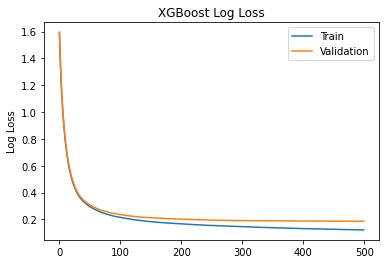

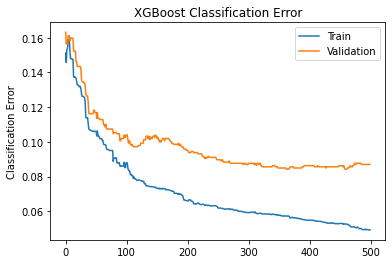

In [ ]:
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Validation')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [ ]:
df_results.head()

,Model Name,Train Accuracy,Validation Accuracy,Test Accuracy
0,AdaBoost on PCA Data,0.550587,0.531611,0.519172
1,Random Forest on PCA Data,1.000000,0.942216,0.894469
2,XGBoost on PCA Data,1.000000,0.949694,0.911435
3,Random Forest on t-SNE Data,1.000000,0.948334,0.848320
4,XGBoost on t-SNE Data,0.950689,0.912984,0.828979


<b>References</b>   
1. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74